# 二值图像投影

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [40]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [56]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

def tobinary(gray,thresh):
    dst = np.zeros_like(gray)
    idx = (gray >= thresh)
    dst[idx] = 255
    return dst

def projection(src):
    rows,cols = src.shape[0],src.shape[1]
    paint_x = np.zeros_like(src)
    paint_y = np.zeros_like(src)
    vertical = np.zeros((cols,),dtype = np.int32)
    horizontal = np.zeros((rows,),dtype = np.int32)
    for i in range(cols):
        for j in range(rows):
            if src[j,i] == 0:
                vertical[i] += 1
    for i in range(cols):
        for j in range(vertical[i]):
            paint_x[rows - j - 1,i] = 255
    
    
    for i in range(rows):
        for j in range(cols):
            if src[i,j] == 0:
                horizontal[i] += 1
                
    for i in range(rows):
        for j in range(horizontal[i]):
            paint_y[i,j] = 255
    
    return paint_x,paint_y
    
    

In [57]:
gray = rgb2gray(src)
binary = tobinary(gray,80)
px,py = projection(binary)

Text(0.5,1,'Horizontal Projection')

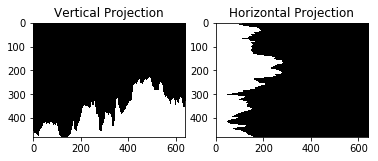

In [58]:
plt.subplot(121)
plt.imshow(px,'gray')
plt.title('Vertical Projection')
plt.subplot(122)
plt.imshow(py,'gray')
plt.title('Horizontal Projection')

参考：

[1]. https://blog.csdn.net/zju_fish1996/article/details/51908584

[2]. https://blog.csdn.net/zju_fish1996/article/details/51908584